# Potenzfunktionen

In der Technik treten häufig Potenzfunktionen auf. Sie haben die Form:

$$
  f(x) = c\cdot x^\kappa
$$

Dabei ist $c$ der Wert, der sich für $x=1$ ergibt (denn $1^\kappa = 1$) und $\kappa$ der Exponent. Potenzfunktionen verlaufen nicht geradlinig, sondern gekrümmt. Dabei kommt es auf den Wert von $\kappa$ an, ob sich diese Steigung progressiv (ansteigend) oder degressiv (abfallend) verhält. 

Ist der Exponent $\kappa$ größer als 1, so liegt ein progressives Wachstum vor. Mit zunehmendem $x$ wird die Steigung im Vergleich zu einer Geraden immer größer, die Kurve liegt oberhalt jeder Tangente (wenn $c>0$ ist).

Liegt $\kappa$ zwischen 0 und 1, so ist da Wachstum degressiv. Mit zunehmendem $x$ wird die Steigung im Vergleich zu einer Geraden immer kleiner, die Kurve liegt unterhalb jeder Tangente (wenn $c<0$ ist).

In der folgenden Abbildung sind Potenzfunktionen für $c=1$ gezeigt:

![](Potenzfunktionen_Vergleich.pdf)

In einem doppelt logarithmisch geteilten Diagramm werden aus den gekrümmten Linien Geraden:

![](Potenzfunktionen_loglog.pdf)

Zum Beispiel wird nach DIN 13829 der Volumenstrom $\dot V_\text{env}$ als Funktion der Druckdifferenz $\Delta p$ zwischen Wandinnenseite und Wandaußenseite durch eine Potenzfunktion 

\begin{align}
  \dot V_\text{env} &= C \cdot (\Delta p)^n
\end{align}

dargestellt. Der Index ${}_\text{env}$ steht dabei für Environment. Wegen

$$
  {\dot V}_\text{env} = C \cdot (\Delta p)^n 
$$

$$
  {\dot V}_\text{env,50} = C \cdot (50 Pa)^n
$$

ergibt sich nachdem die linke und die rechte Seite durcheinander dividiert werden:

$$
  \dfrac{\dot V_\text{env}}{\dot V_\text{env,50}} = \left(\dfrac{\Delta p}{50 Pa}\right)^n
$$

oder

$$
  {\dot V}_\text{env} = \dot V_\text{env,50}\cdot\left(\dfrac{\Delta p}{50 Pa}\right)^n
$$

Sind daher der Volumenstrom $\dot V_\text{env,50}$ bei $50Pa$ Druckdifferenz und der Exponent $n$ aus einem Blowerdoortest bekannt, dann kann zu jedem beliebigen Druck $\Delta p$ der zugehörige Volumenstrom $\dot V_\text{env}$ berechnet werden.

In [2]:
from sympy import *
init_printing()

from fun_expr import Function_from_Expression as FE

import matplotlib.pyplot as plt, matplotlib.ticker as tk
%config InlineBackend.figure_format='retina'
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.optimize import curve_fit

import messwerte as mw

# Beispiel

In einem Raum mit $64 m^2$ Nutzfläche und einer Geschosshöhe von $3.5 m$ wurde bei $50\,Pa$ Druckdifferenz eine Luftwechselzahl von $n_{50} = 3.5\,h^{-1}$ Luftwechseln je Stunde gemessen. Der Exponent wurde als $n=0.667$ ermittelt.

Der Zugehörige Volumenstrom ergibt sich aus der Formel

$$
  \dot V = V_\text{Ra}\,n_{50}
$$

Vergleichen Sie den Verlauf von $\dot V$ als Funktion von $\Delta p$ in einem linear geteilten Diagramm mit dem Verlauf in einem doppelt logarithmisch geteilten Diagramm, indem Sie beide Diagramme erzeugen.

Nutzen Sie für $x$ das Intervall $1 \le x \le 100$, wobei $x$ der Druck in Pa ist.

Um ein Diagramm logarithmisch zu teilen, werden die Befehle

```fig,ax = plt.subplots() # erzeuge das Diagramm
ax.set_xscale('log') # für die x-Achse
ax.set_yscale('log') # für die y-Achse
```

benutzt.

In [3]:
A_n = 64 # m**2
h_ra = 3.50 # m

V_ra = A_n*h_ra
n_50 = 3.5 # h**(-1)

dV_50 = V_ra*n_50

n = 0.667

Volumenstrom bei $50\,Pa$ Druckdifferenz:

In [4]:
dV_50 # m**3/h

Die Potenzfunktion:

In [5]:
x = Symbol('x')

f = FE(x, dV_50*(x/50)**n, name='f')
f.equation()

<IPython.core.display.Math object>

Der DataFrame mit 100 Messpunkten:

In [6]:
lx = np.linspace(1,100,100)

df = pd.DataFrame(
    {
        'x': lx,
        'y': f.lambdified(lx)
    }
)

df.head()

,x,y
0,1.0,57.690336
1,2.0,91.598862
2,3.0,120.044688
3,4.0,145.437729
4,5.0,168.778088


Darstellung des Funktionsverlaufs:

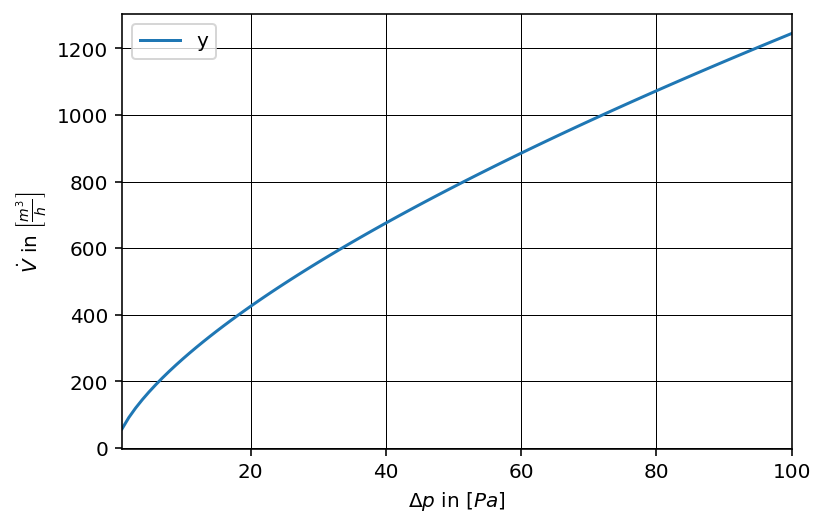

In [7]:
ax = df.plot(x='x')

ax.set(
    xlabel=r'$\Delta p$ in $[Pa]$',
    ylabel=r'$\dot V$ in $\left[\frac{m^3}{h}\right]$'
)

ax.grid(lw=0.5,c='k')

Darstellung des Funktionsverlaufs im doppelt logarithmisch geteilten Diagramm:

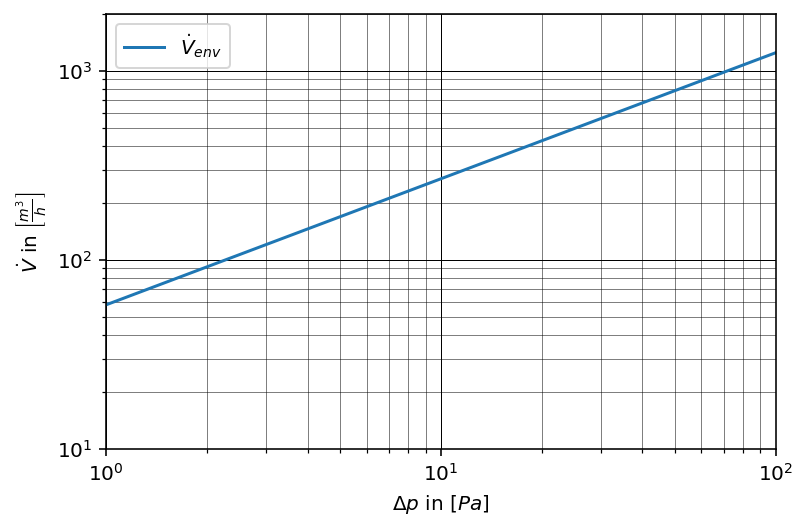

In [8]:
ax = df.plot(x='x',y='y',label=r"$\dot V_{env}$")

ax.set(
    xlabel=r'$\Delta p$ in $[Pa]$',
    ylabel=r'$\dot V$ in $\left[\frac{m^3}{h}\right]$'
)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(1,100),ylim=(10,2000))
ax.grid(lw=0.5,c='k')
ax.grid(which='minor',lw=0.25,c='k')

# Aufgabe

Bei einem Versuch wurden für das obige Gebäude lediglich zwei Messungen durchgeführt und dabei für einen Druck von $50\,Pa$ ein Volumenstrom von $784\,\frac{m^3}{h}$ und bei $100\,Pa$ ein Volumenstrom von $1245\,\frac{m^3}{h}$ gemessen.

Um $\dot V_\text{env}$ bei einem Luftdruck von $4\,Pa$ zu berechnen, wurde der folgende lineare Funktionsansatz genutzt:

$$
  \dot V_\text{env} = 
  \dfrac{\dot V_\text{env,100} - \dot V_\text{env,50}}
        {50\,Pa}\cdot (\Delta p - 50\,Pa) 
  + \dot V_\text{env,50}
$$

1. Berechnen Sie die beiden Werte $\dot V_\text{env}$ für $50\,Pa$ und für $100\,Pa$ auf eine Nachkommastelle genau.
2. Überprüfen Sie, ob dieser Ansatz für $\Delta p = 50\,Pa$ und für $\Delta p = 100\,Pa$ korrekte Werte liefert.
3. Wie ist das Ergebnis bei $\Delta p = 4\,Pa$ zu bewerten? 